# Exploratory Data Analysis
## (Additional Data)
## 

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Loading additional data

In [2]:
folder_path = r'..\data\Additional_data'

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        full_path = os.path.join(folder_path, file)
        print(f"Reading file: {full_path}")
        print(file)
        df_master = pd.read_csv(
            full_path,
            low_memory=False
            # encoding='cp1252',
            # low_memory=False
        )

        print(df_master.head())
        print(df_master.shape, '\n')
        print(df_master.columns)

Reading file: ..\data\Additional_data\FY_2024_SNF_VBP_Aggregate_Performance.csv
FY_2024_SNF_VBP_Aggregate_Performance.csv
   Baseline Period: FY 2019 National Average Readmission Rate  \
0                                            0.19788            

   Performance Period: FY 2022 National Average Readmission Rate  \
0                                            0.20223               

   FY 2024 Achievement Threshold  FY 2024 Benchmark  \
0                        0.79271            0.83033   

  Range of Performance Scores  \
0           0.00000-100.00000   

   Total Number of SNFs Receiving Value-Based Incentive Payments  \
0                                              10858               

  Range of Incentive Payment Multipliers  \
0              0.9802538758-1.0176785153   

  Range of Value-Based Incentive Payments ($)  \
0        To be added after the end of FY 2024   

  Total Amount of Value-Based Incentive Payments ($)  
0               To be added after the end of FY 2024

### Explore on specific file

In [3]:
folder_path = r'..\data\Additional_data'
file = 'NH_ProviderInfo_Oct2024.csv'

full_path = os.path.join(folder_path, file)
df = pd.read_csv(full_path, low_memory=False)
print(df.shape, '\n')
print(df.columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df.head()

(14814, 103) 

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       ...
       'Number of Citations from Infection Control Inspections',
       'Number of Fines', 'Total Amount of Fines in Dollars',
       'Number of Payment Denials', 'Total Number of Penalties', 'Location',
       'Latitude', 'Longitude', 'Geocoding Footnote', 'Processing Date'],
      dtype='object', length=103)


,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Average Number of Residents per Day Footnote,Provider Type,Provider Resides in Hospital,Legal Business Name,Date First Approved to Provide Medicare and Medicaid Services,Affiliated Entity Name,Affiliated Entity ID,Continuing Care Retirement Community,Special Focus Status,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,QM Rating,QM Rating Footnote,Long-Stay QM Rating,Long-Stay QM Rating Footnote,Short-Stay QM Rating,Short-Stay QM Rating Footnote,Staffing Rating,Staffing Rating Footnote,Reported Staffing Footnote,Physical Therapist Staffing Footnote,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Total nursing staff turnover footnote,Registered Nurse turnover,Registered Nurse turnover footnote,Number of administrators who have left the nursing home,Administrator turnover footnote,Nursing Case-Mix Index,Nursing Case-Mix Index Ratio,Case-Mix Nurse Aide Staffing Hours per Resident per Day,Case-Mix LPN Staffing Hours per Resident per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day,Case-Mix Weekend Total Nurse Staffing Hours per Resident per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Adjusted Weekend Total Nurse Staffing Hours per Resident per Day,Rating Cycle 1 Standard Survey Health Date,Rating Cycle 1 Total Number of Health Deficiencies,Rating Cycle 1 Number of Standard Health Deficiencies,Rating Cycle 1 Number of Complaint Health Deficiencies,Rating Cycle 1 Health Deficiency Score,Rating Cycle 1 Number of Health Revisits,Rating Cycle 1 Health Revisit Score,Rating Cycle 1 Total Health Score,Rating Cycle 2 Standard Health Survey Date,Rating Cycle 2 Total Number of Health Deficiencies,Rating Cycle 2 Number of Standard Health Deficiencies,Rating Cycle 2 Number of Complaint Health Deficiencies,Rating Cycle 2 Health Deficiency Score,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Rating Cycle 3 Standard Health Survey Date,Rating Cycle 3 Total Number of Health Deficiencies,Rating Cycle 3 Number of Standard Health Deficiencies,Rating Cycle 3 Number of Complaint Health Deficiencies,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Number of Health Revisits,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,57,53.3,NaN,Medicare and Medicaid,N,"BURNS NURSING HOME, INC.",9/1/1969,NaN,NaN,N,NaN,N,N,N,Resident,Yes,2.0,NaN,2.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,2.58352,0.42259,1.28749,1.71009,4.

In [4]:
df['CMS Certification Number (CCN)'].str.isnumeric().all()

np.False_

In [5]:
mask = ~df['CMS Certification Number (CCN)'].str.isnumeric()
df.loc[mask, 'CMS Certification Number (CCN)']

222      01A193
223      01A208
603      04A158
604      04A293
1225     05A024
          ...  
13303    52A429
13304    52A461
13337    53A002
13338    53A050
13339    53A051
Name: CMS Certification Number (CCN), Length: 261, dtype: object

### Statistics

In [6]:
print(f"There are {df['CMS Certification Number (CCN)'].nunique()} providers in the dataset")
print(f"There are {df['Provider Type'].nunique()} different provider types in the dataset:\n\t\t {df['Provider Type'].unique()}")

There are 14814 providers in the dataset
There are 3 different provider types in the dataset:
		 ['Medicare and Medicaid' 'Medicare' 'Medicaid']


### Histogram plot

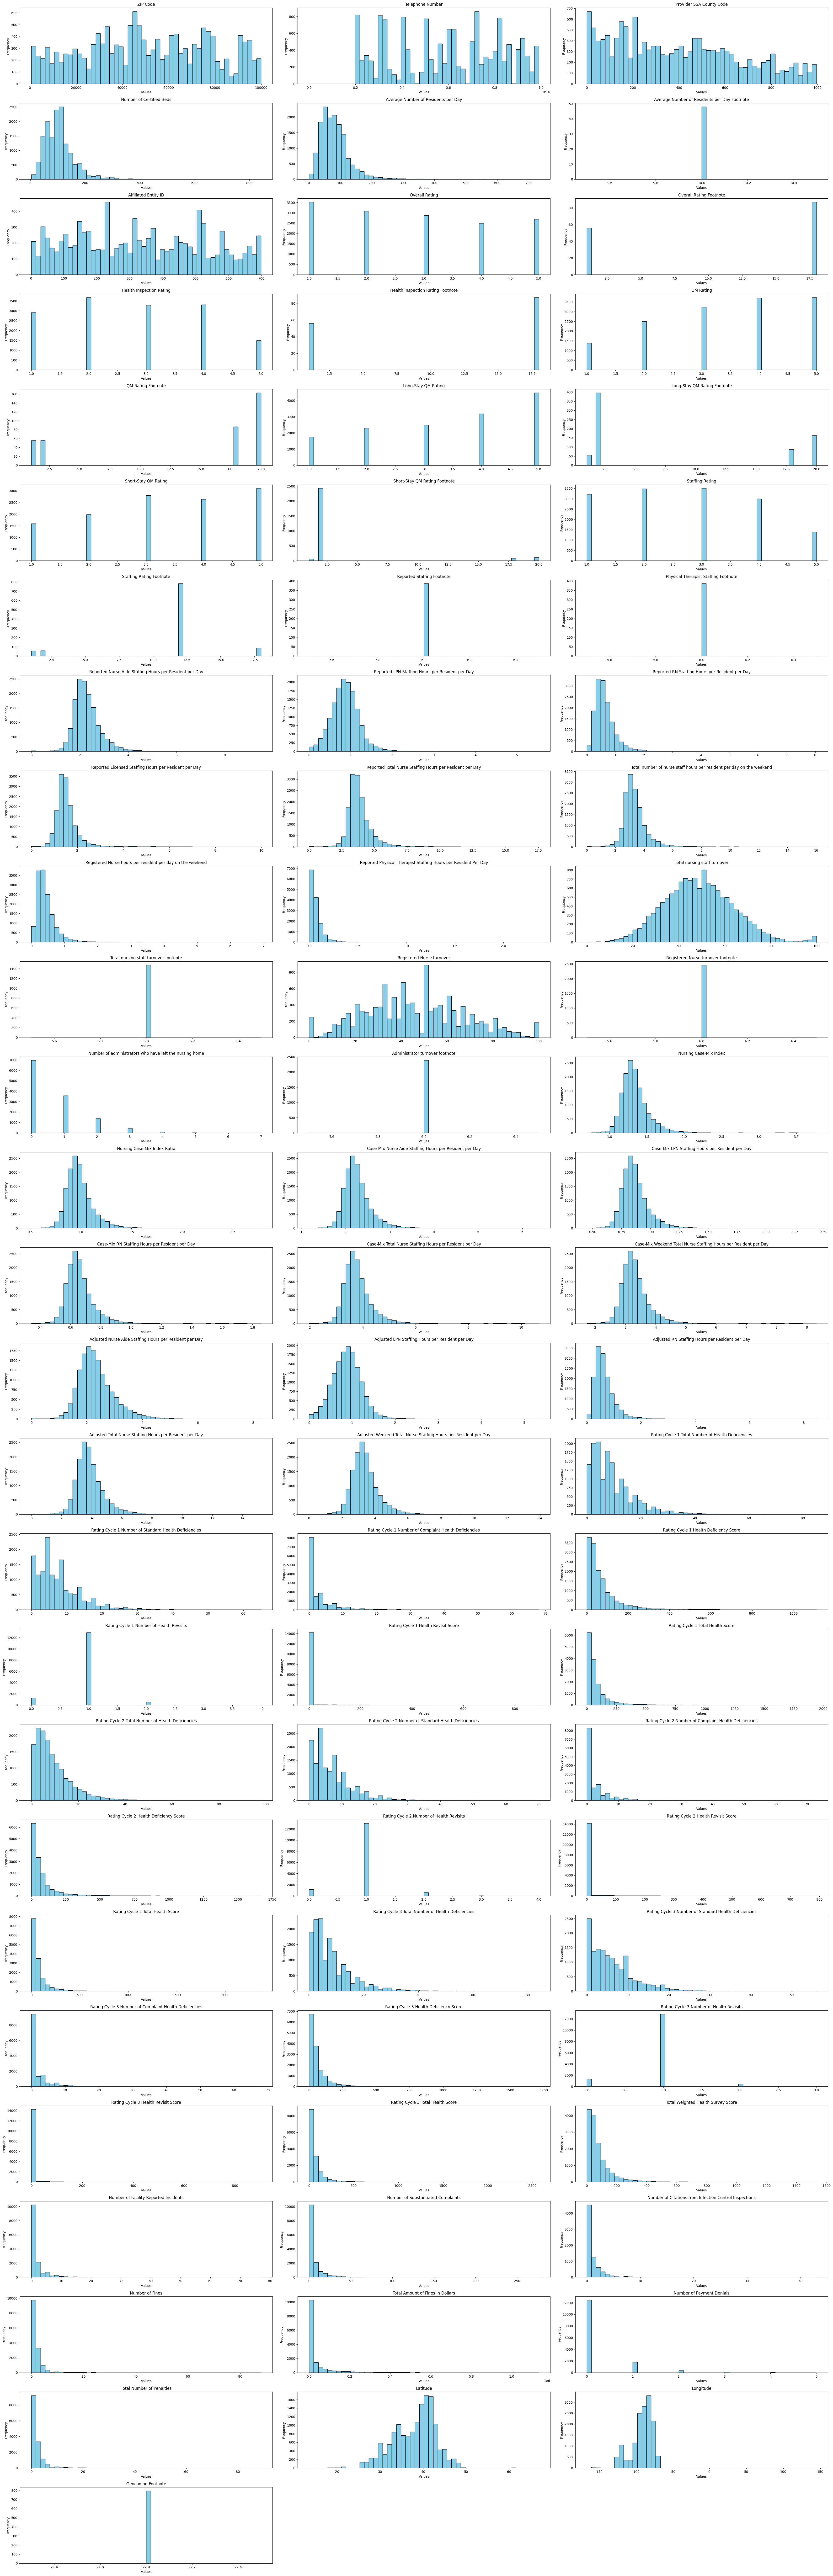

In [11]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, n_rows*4))

for ax, col in zip(axes.flatten(), numeric_cols):
    ax.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# hide empty subplots
for ax in axes.flatten()[len(numeric_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('../Report/additional_data_columns.png', dpi=300)
plt.show()

### Duplicates

In [8]:
row_dups = df.duplicated().any()
col_dups = df.columns.duplicated().any()

if not row_dups and not col_dups:
    print("No duplicate rows or columns found")
else:
    if row_dups:
        print("Duplicate rows:")
        print(df[df.duplicated()])

    if col_dups:
        print("Duplicate columns:")
        print(df.columns[df.columns.duplicated()])


No duplicate rows or columns found


### Consider Unique key 

In [9]:
unique_key_dups = df['CMS Certification Number (CCN)'].duplicated().any()
unique_key_dups

np.False_